# Pneumonia Detection from Chest X-Ray Images using CNN & ANN

In [1]:
# For data handling and image processing
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models


In [2]:
# Install the Kaggle CLI tool
!pip install kaggle


In [3]:
from google.colab import files
files.upload()

# Step 2: Set up Kaggle API authentication
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


!unzip chest-xray-pneumonia.zip -d chest_xray


import os
print(os.listdir('chest_xray'))


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORM

In [4]:
# Set up directories for training and validation data
train_dir = '/content/chest_xray/chest_xray/train'
val_dir = '/content/chest_xray/chest_xray/test'

# Set up the ImageDataGenerator for training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## BUILD CNN MODEL

In [5]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 515ms/step - accuracy: 0.6914 - loss: 0.8986 - val_accuracy: 0.6859 - val_loss: 0.5817
Epoch 2/10
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8438 - loss: 0.4761

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.8146 - loss: 0.3974 - val_accuracy: 0.7420 - val_loss: 0.4765
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 542ms/step - accuracy: 0.8481 - loss: 0.3280 - val_accuracy: 0.7115 - val_loss: 0.5950
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 331ms/step - accuracy: 0.8515 - loss: 0.3403 - val_accuracy: 0.8077 - val_loss: 0.3900
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 505ms/step - accuracy: 0.8688 - loss: 0.3001 - val_accuracy: 0.8205 - val_loss: 0.4316
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.8675 - loss: 0.3045 - val_accuracy: 0.8782 - val_loss: 0.2969
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.8941 - loss: 0.2507 - val_accuracy: 0.7821 - val_loss: 0.4199
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 325ms/step - accuracy: 0.8779 - loss: 0.2659 - val_accuracy: 0.8237 - val_loss: 0.4265
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 503ms/step - accuracy: 0.8920 - loss: 0.2553 - va

In [7]:
# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.9136 - loss: 0.2480
Validation Accuracy: 89.90%


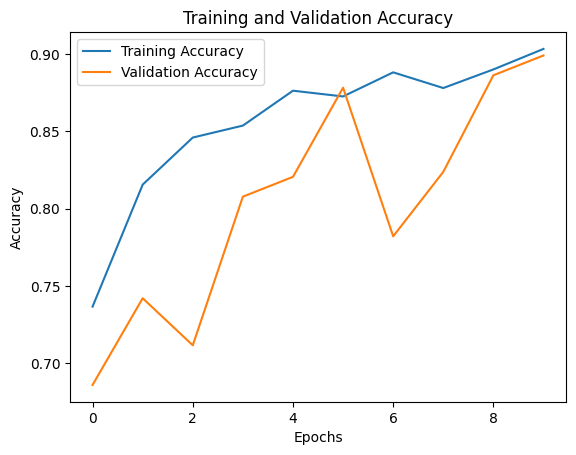

In [8]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Predict the class
prediction = model.predict(img_array)

# Print prediction value and result
print(f"Prediction probability: {prediction[0][0]:.4f}")
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
Prediction probability: 0.1273
Prediction: Normal


# USING ANN

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

# Build a more complex ANN
model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 538ms/step - accuracy: 0.6263 - loss: 19.1707 - val_accuracy: 0.3766 - val_loss: 4.1608
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.6229 - loss: 5.5467 - val_accuracy: 0.6282 - val_loss: 2.3600
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - accuracy: 0.6271 - loss: 2.5136 - val_accuracy: 0.6250 - val_loss: 1.6864
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.6731 - loss: 1.8002 - val_accuracy: 0.6250 - val_loss: 1.4449
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 485ms/step - accuracy: 0.6656 - loss: 1.7006 - val_accuracy: 0.6250 - val_loss: 1.3040
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.6809 - loss: 1.4850 - val_accuracy: 0.6250 - val_loss: 1.6174
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 477ms/step - accuracy: 0.6756 - loss: 1.4448 - val_accuracy: 0.6250 - val_loss: 1.3641
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.7053 - loss: 

In [13]:
# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.6409 - loss: 0.9119
Validation Accuracy: 62.50%


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = '/content/chest_xray/chest_xray/test/PNEUMONIA/person112_bacteria_539.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the ANN model
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
Prediction: Pneumonia


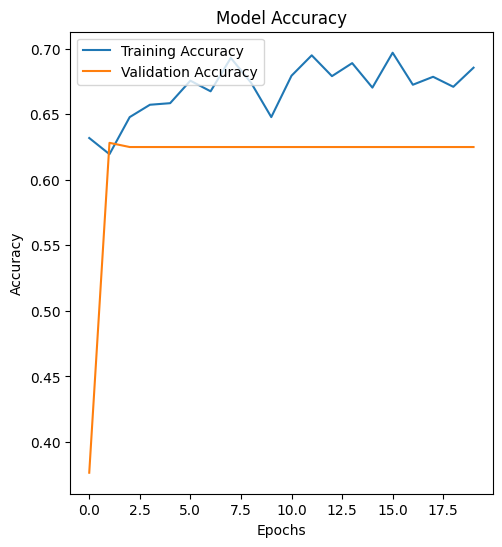

In [15]:
# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')